# Linear Regression

In [1]:
import matplotlib.pyplot as plot 
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
from pandas import DataFrame
from sklearn.linear_model import LinearRegression as lr

In [2]:
import sys
import sklearn
print(sys.version)
!python --version
print("numpy:",np.__version__)
print("sklearn:",sklearn.__version__)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
Python 3.9.12
numpy: 1.21.5
sklearn: 1.0.2


# 1.3Ghz

In [4]:
dataset=pd.read_csv("For_1.3Ghz.csv")
dataset

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [5]:
#dataset.drop('Unnamed: 0', inplace=True, axis=1)
dataset.to_csv("For_1.3Ghz.csv",index=False)
dataset

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [6]:
dataset = dataset.rename(columns={'0': 'CPU LOAD','1': 'MEMORY USAGE','2': 'PAGE FAULT','3': 'CPU IDLE TIME',
                                  '4': 'CACHE MISS','5': 'TEMPERATURE','6': 'LABEL'})
dataset.to_csv("For_1.3Ghz.csv",index=False)

In [7]:
dataset

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [8]:
dataset.LABEL.describe()

count    392.000000
mean      90.159242
std       26.197013
min       57.100470
25%       62.560237
50%       85.641485
75%      108.085276
max      147.691754
Name: LABEL, dtype: float64

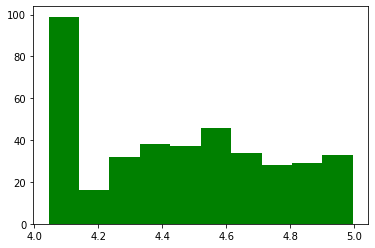

In [9]:
target = np.log(dataset.LABEL)
plot.hist(target, color='green')
plot.show()

In [10]:
numeric_features =dataset.select_dtypes(include=[np.number])

In [11]:
numeric_features.dtypes

CPU LOAD         float64
MEMORY USAGE     float64
PAGE FAULT       float64
CPU IDLE TIME    float64
CACHE MISS       float64
TEMPERATURE      float64
LABEL            float64
dtype: object

In [12]:
X=dataset.iloc[:,0:6]
y=dataset.iloc[:,6:7]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [14]:
print ("Train data shape:", dataset.shape)
print ("Test data shape:", dataset.shape)

Train data shape: (392, 7)
Test data shape: (392, 7)


In [15]:
X_train

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE
90,0.005280,0.010012,0.068638,0.006186,0.996132,0.053323
385,0.006240,0.009862,0.147345,0.006093,0.981141,0.124411
154,0.005978,0.010854,0.118690,0.006181,0.989964,0.075447
275,0.006326,0.009997,0.067657,0.007012,0.993772,0.087463
136,0.005961,0.009974,0.102560,0.006189,0.992286,0.068391
...,...,...,...,...,...,...
331,0.006291,0.009941,0.101350,0.006160,0.989040,0.106540
177,0.005933,0.009928,0.137859,0.006963,0.986828,0.083565
172,0.005943,0.009944,0.133711,0.007778,0.987539,0.081808
272,0.006333,0.010007,0.067723,0.007027,0.993853,0.086492


In [16]:
y_train

,LABEL
90,62.506554
385,145.162253
154,86.240951
275,100.126581
136,79.443281
...,...
331,123.813272
177,96.820247
172,93.843238
272,100.152875


In [17]:
regressor = lr()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9994035916593729

In [18]:
y_pred = regressor.predict(X_train)
y_pred

array([[ 61.79366577],
       [144.70780241],
       [ 87.13919193],
       [100.72007716],
       [ 79.19994843],
       [ 76.50331774],
       [ 60.31368094],
       [ 82.19138429],
       [ 92.21292834],
       [116.90078223],
       [ 70.29934015],
       [ 58.58615291],
       [ 61.79943034],
       [111.90424586],
       [132.38865907],
       [ 65.69101171],
       [124.57354902],
       [ 77.5193324 ],
       [ 88.39000801],
       [ 61.75154611],
       [124.9742211 ],
       [109.27634567],
       [ 61.34614374],
       [136.20276535],
       [121.47380907],
       [ 84.27638611],
       [ 61.73512932],
       [ 61.30963584],
       [ 60.76481716],
       [ 67.37203447],
       [ 94.99288439],
       [ 92.25996284],
       [144.30355658],
       [132.79270046],
       [ 65.23953074],
       [ 83.87687611],
       [ 58.23346664],
       [129.65289682],
       [ 67.80578583],
       [104.63817046],
       [ 58.60423493],
       [142.28283808],
       [ 76.90405795],
       [ 80

In [19]:
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_train,y_pred))
print ("Training error:",mse)

Training error: 0.6378019937484934


In [20]:
y_pred_test = regressor.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test,y_pred_test))
print ("Test error: ",mse)

Test error:  0.64709609546008


# 2Ghz

In [21]:
dataset_2=pd.read_csv("For_2Ghz.csv")
dataset_2

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [22]:
#dataset_2.drop('Unnamed: 0', inplace=True, axis=1)
dataset_2.to_csv("For_2Ghz.csv",index=False)
dataset_2

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [23]:
dataset_2 = dataset_2.rename(columns={'0': 'CPU LOAD','1': 'MEMORY USAGE','2': 'PAGE FAULT','3': 'CPU IDLE TIME',
                                  '4': 'CACHE MISS','5': 'TEMPERATURE','6': 'LABEL'})
dataset_2.to_csv("For_2Ghz.csv",index=False)

In [24]:
dataset_2

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE,LABEL
0,0.003018,0.010959,0.058589,0.007931,0.996903,0.050600,58.113546
1,0.003015,0.010949,0.059421,0.007893,0.996856,0.050552,58.617419
2,0.003013,0.010939,0.059369,0.007355,0.996866,0.050508,58.468332
3,0.003010,0.010929,0.060199,0.007073,0.996821,0.050461,57.944083
4,0.003010,0.010929,0.060199,0.007065,0.996821,0.050461,57.118212
...,...,...,...,...,...,...,...
387,0.006233,0.009850,0.148900,0.006086,0.980837,0.124955,146.014278
388,0.006232,0.009848,0.149740,0.006085,0.980668,0.125280,145.700933
389,0.006231,0.009847,0.150580,0.006084,0.980498,0.125604,147.010833
390,0.006230,0.009845,0.151419,0.006083,0.980327,0.125928,147.070817


In [25]:
dataset_2.TEMPERATURE.describe()

count    392.000000
mean       0.078093
std        0.022582
min        0.050411
25%        0.054288
50%        0.074735
75%        0.093858
max        0.126252
Name: TEMPERATURE, dtype: float64

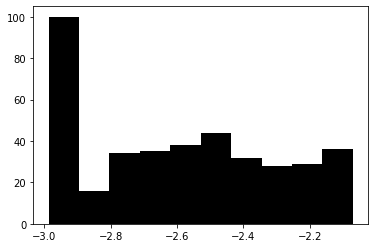

In [26]:
target = np.log(dataset.TEMPERATURE)
plot.hist(target, color='black')
plot.show()

In [27]:
numeric_features =dataset.select_dtypes(include=[np.number])

In [28]:
numeric_features.dtypes

CPU LOAD         float64
MEMORY USAGE     float64
PAGE FAULT       float64
CPU IDLE TIME    float64
CACHE MISS       float64
TEMPERATURE      float64
LABEL            float64
dtype: object

In [29]:
S=dataset.iloc[:,0:6]
R=dataset.iloc[:,6:7]

In [30]:
from sklearn.model_selection import train_test_split
S_train, S_test, R_train, R_test = train_test_split(S,R,test_size=0.2) 

In [31]:
print ("Train data shape:", dataset.shape)
print ("Test data shape:", dataset.shape)

Train data shape: (392, 7)
Test data shape: (392, 7)


In [32]:
S_train

,CPU LOAD,MEMORY USAGE,PAGE FAULT,CPU IDLE TIME,CACHE MISS,TEMPERATURE
171,0.005944,0.009945,0.132857,0.007809,0.987685,0.081441
228,0.006337,0.010014,0.063366,0.006196,0.995368,0.071057
147,0.006000,0.010892,0.112932,0.007882,0.990805,0.073039
120,0.005987,0.010869,0.088921,0.006189,0.993973,0.062590
231,0.006336,0.010012,0.064237,0.006186,0.995237,0.072104
...,...,...,...,...,...,...
284,0.006319,0.009985,0.068453,0.006170,0.993450,0.090516
266,0.006339,0.010869,0.067794,0.006198,0.994018,0.084470
243,0.006322,0.009990,0.066728,0.006172,0.994771,0.076157
254,0.006353,0.010892,0.067937,0.006211,0.994344,0.080412


In [33]:
R_train

,LABEL
171,93.520927
228,81.253425
147,84.879469
120,71.789059
231,82.372934
...,...
284,104.024861
266,97.880799
243,87.166295
254,92.674738


In [34]:
regressor = lr()
regressor.fit(S_train, R_train)

LinearRegression()

In [35]:
P_pred = regressor.predict(S_train)
P_pred

array([[ 94.47366507],
       [ 81.94196625],
       [ 84.10460908],
       [ 71.98362984],
       [ 83.13383   ],
       [ 59.15576371],
       [103.85894051],
       [130.1119357 ],
       [139.97318696],
       [ 86.56824032],
       [ 61.24572388],
       [ 88.73525364],
       [ 61.30627876],
       [ 59.40800785],
       [ 60.67826935],
       [ 59.50754507],
       [ 95.48747724],
       [ 95.80957289],
       [ 98.45429663],
       [ 70.25808096],
       [ 61.3532392 ],
       [ 61.35457761],
       [ 60.73595568],
       [115.7695306 ],
       [ 61.71731508],
       [ 67.3594198 ],
       [142.33182566],
       [ 60.28347795],
       [ 98.89955189],
       [107.78406441],
       [ 61.37140988],
       [ 61.67577732],
       [ 58.63750529],
       [ 61.68065065],
       [135.485613  ],
       [142.73996683],
       [ 81.10949009],
       [ 90.37735373],
       [ 82.86261033],
       [ 63.16945052],
       [ 65.23639   ],
       [ 71.55116671],
       [122.51766266],
       [ 86

In [36]:
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(R_train,P_pred))
print ("Training error:",mse)

Training error: 0.6271985012466138


In [37]:
P_pred_test = regressor.predict(S_test)
mse = math.sqrt(mean_squared_error(R_test,P_pred_test))
print ("Test error: ",mse)

Test error:  0.6930340135676594
